**Importeren van benodigde libraries & het imporeren van de eerste dataset**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import json 
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

gb_dataframe = pd.read_csv("../initialdata/GBvideos.csv")
dataframeUS = pd.read_csv('../initialdata/USvideos.csv')
dataframeDE = pd.read_csv('../initialdata/DEvideos.csv')
dataframeFR = pd.read_csv('../initialdata/FRvideos.csv')
dataframeCA = pd.read_csv("../initialdata/CAvideos.csv")


In [2]:
gb_dataframe

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [3]:
#info over GBvideos.csv 
gb_dataframe.info

<bound method DataFrame.info of           video_id trending_date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V..

In [4]:
#Alle columns checken
gb_dataframe.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

# Verbanden likes per categorie<br>
--verhaaltje--

In [5]:
#Overzicht categorieen
gb_dataframe['category_id'].sort_values()

4575      1
22742     1
33712     1
33706     1
13794     1
         ..
36261    43
37824    43
36616    43
36792    43
35748    43
Name: category_id, Length: 38916, dtype: int64

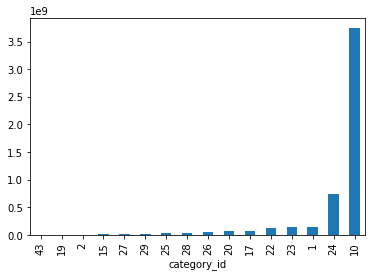

In [6]:
#hoeveelheid likes bij categorie. Alleen uitkomst nog niet helemaal duidelijk
gb_dataframe["LikesByCategory"] = gb_dataframe["likes"]

gb_dataframe.groupby("category_id").sum().sort_values("likes")["LikesByCategory"].plot(kind="bar")


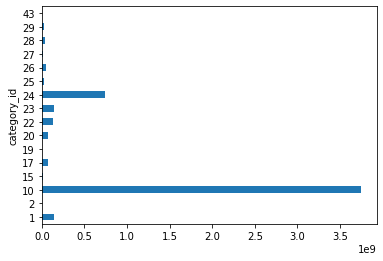

In [7]:
gb_dataframe.groupby("category_id").sum()['likes'].plot(kind='barh')

In [8]:
#gekeken naar de maximaal aantal likes per categorie
gb_dataframe.groupby("category_id").max()['likes'].plot(kind='barh')

AssertionError: 

In [9]:
#gekeken naar de minimale likes per categorie. maar lijkt niet te kloppen met 43 en 29 kunnen we niet checken.
gb_dataframe.groupby("category_id").min()['likes'].plot(kind='barh')

AssertionError: 

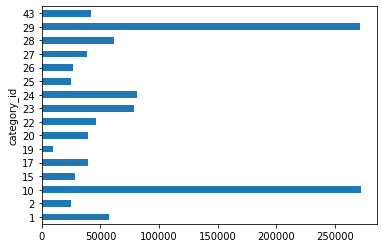

In [10]:
#gemiddelde aantal likes per categorie
gb_dataframe.groupby("category_id").mean()['likes'].plot(kind='barh')

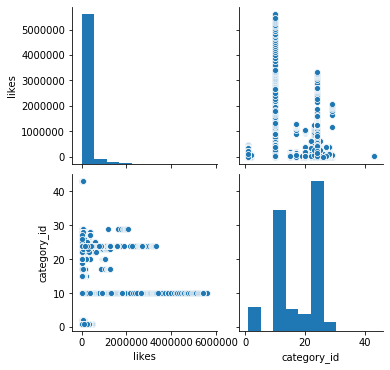

In [11]:
#een overzicht qua likes en category_id. (niet heel duidelijk zoals ik had verwacht)
sn.pairplot(gb_dataframe ,vars=["likes", "category_id"])

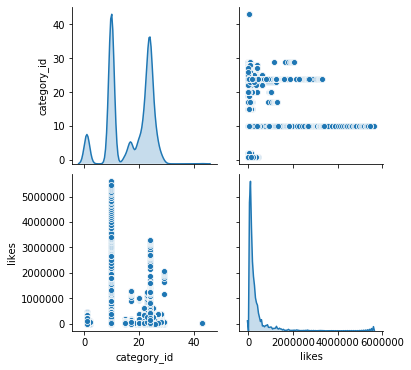

In [12]:
#andere manier van tonen maar ook minder duidelijk dan ik had verwacht.
#Wel duidelijker dan de vorige. 
sn.pairplot(gb_dataframe ,vars=["category_id", "likes"], diag_kind="kde")

In [13]:
#conclusie: categorie 43 waarschijnlijk weinig videos, categorie 10 populairste qua likes.
#

# Ophalen categorie naam per categorie ID

In [ ]:
#Json file uitlezen om te kijken welke catogorie ID bij welk omschrijving hoort.

In [ ]:
#begonnen met de Json file van GB

In [15]:
#inlezen van de json file
json = pd.read_json('../initialdata/GB_category_id.json')


In [16]:
#hiermee haal je alle informatie uit items en verdeel je dat in columns
json_normalize(json['items'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [17]:
#Variabele aangemaakt waar ik alle de informatie in zet als columns
jsonItems = json_normalize(json['items'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [18]:
#test of mijn variabele heeft gewerkt.
jsonItems.columns

Index(['kind', 'etag', 'id', 'snippet.channelId', 'snippet.title',
       'snippet.assignable'],
      dtype='object')

In [19]:
#geprobeerd alles goed te orderen. nog niet helemaal goed gelukt
jsonItems.groupby(['id'])['snippet.title'].sum()

id
1         Film & Animation
10                   Music
15          Pets & Animals
17                  Sports
18            Short Movies
19         Travel & Events
2         Autos & Vehicles
20                  Gaming
21           Videoblogging
22          People & Blogs
23                  Comedy
24           Entertainment
25         News & Politics
26           Howto & Style
27               Education
28    Science & Technology
30                  Movies
31         Anime/Animation
32        Action/Adventure
33                Classics
34                  Comedy
35             Documentary
36                   Drama
37                  Family
38                 Foreign
39                  Horror
40          Sci-Fi/Fantasy
41                Thriller
42                  Shorts
43                   Shows
44                Trailers
Name: snippet.title, dtype: object

In [20]:
jsonItems.groupby(['id'])['snippet.title'].sum()

id
1         Film & Animation
10                   Music
15          Pets & Animals
17                  Sports
18            Short Movies
19         Travel & Events
2         Autos & Vehicles
20                  Gaming
21           Videoblogging
22          People & Blogs
23                  Comedy
24           Entertainment
25         News & Politics
26           Howto & Style
27               Education
28    Science & Technology
30                  Movies
31         Anime/Animation
32        Action/Adventure
33                Classics
34                  Comedy
35             Documentary
36                   Drama
37                  Family
38                 Foreign
39                  Horror
40          Sci-Fi/Fantasy
41                Thriller
42                  Shorts
43                   Shows
44                Trailers
Name: snippet.title, dtype: object

In [ ]:
jsonItems.groupby(['id'])['snippet.title'].sum().sort_values("id")

In [ ]:
#max aantal views per categorie (use story 3 maar niet goed gelukt)
gb_dataframe.groupby("category_id")['views'].plot(kind='bar')

In [ ]:
#min aantal views per categorie
DataframeGB.groupby("category_id").min()['views'].plot(kind='bar')

# Wat zijn de meeste comments op een categorie?

In [27]:
gb_dataframe_nodupes = gb_dataframe.drop_duplicates(subset = 'video_id', keep= 'first')
df = pd.DataFrame({"title" : gb_dataframe_nodupes['title'],"category_id" : gb_dataframe_nodupes['category_id'], "comment_count" : gb_dataframe_nodupes["comment_count"]})
df

,title,category_id,comment_count
0,John Lewis Christmas Ad 2017 - #MozTheMonster,26,9479
1,Taylor Swift: …Ready for It? (Live) - SNL,24,2757
2,Eminem - Walk On Water (Audio) ft. Beyoncé,10,125882
3,Goals from Salford City vs Class of 92 and Fri...,17,37
4,Dashcam captures truck's near miss with child ...,25,30
...,...,...,...
38763,Conway: People are bending to the will of Pres...,25,1294
38767,Семён Слепаков: Олé-Олé-Олé!,23,16505
38782,Live It Up (Official Video) - Nicky Jam feat. ...,10,64390
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,10,1895


In [28]:
gb_dataframe_nodupes['comment_count'].sort_values()

25985         0
21187         0
18985         0
223           0
20784         0
          ...  
2199     395562
16389    400416
4593     462108
34463    692311
9993     733371
Name: comment_count, Length: 3272, dtype: int64

In [34]:
#welke catergory krijgt meeste comments
gb_dataframe_nodupes_new = gb_dataframe_nodupes.copy()
gb_dataframe_nodupes_new["CommentsbyCategory"] = gb_dataframe_nodupes_new["comment_count"]

gb_dataframe_nodupes_new.groupby("category_id").max().sort_values("comment_count")["CommentsbyCategory"].plot(kind="bar")

AssertionError: 

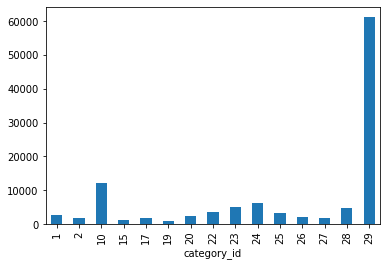

In [36]:
#Arithmetic mean (“average”) of data. Lijkt erop dat 29 gemiddeld meer comments krijgt dan andere categories 
gb_dataframe_nodupes_new.groupby("category_id").mean()['comment_count'].plot(kind='bar')

# Verschillen views/categories per land?

In [40]:
#Duplicates droppen van de US database. DF laten zien met nuttige informatie over de US database
dataframeUS = dataframeUS.drop_duplicates(subset = 'video_id', keep= 'first')
df = pd.DataFrame({"title" : dataframeUS['title'],"category_id" : dataframeUS['category_id'], "views" : dataframeUS['views']})
df

,title,category_id,views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,22,748374
1,The Trump Presidency: Last Week Tonight with J...,24,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",23,3191434
3,Nickelback Lyrics: Real or Fake?,24,343168
4,I Dare You: GOING BALD!?,24,2095731
...,...,...,...
40760,CRAYOLA MAKEUP | HIT OR MISS?,26,607422
40761,First Take reacts: Kyrie Irving says contract ...,17,812832
40762,Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs,24,864189
40764,Carla Makes BA Smashburgers | From the Test Ki...,26,540149


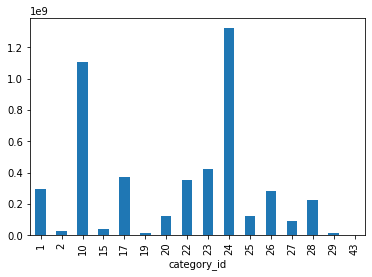

In [41]:
#Meeste views per category bepalen United States
dataframeUS["viewsbyCategory"] = dataframeUS["views"]

dataframeUS.groupby("category_id").sum()["viewsbyCategory"].plot(kind="bar")

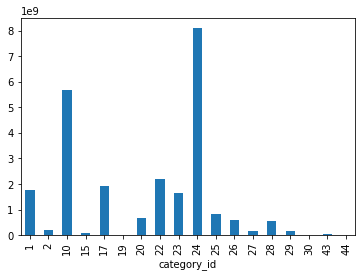

In [42]:
#Meeste views per category bepalen Duitsland
dataframeDE["viewsbyCategory"] = dataframeDE["views"]

dataframeDE.groupby("category_id").sum()["viewsbyCategory"].plot(kind="bar")

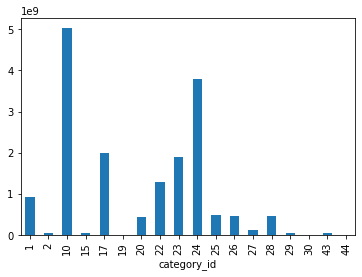

In [43]:
#Meeste views per category bepalen Frankrijk
dataframeFR["viewsbyCategory3"] = dataframeFR["views"]

dataframeFR.groupby("category_id").sum()["viewsbyCategory3"].plot(kind="bar")

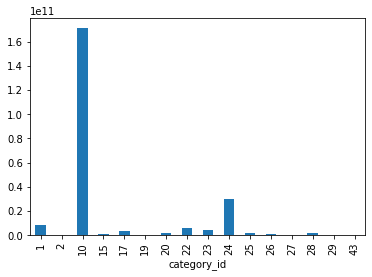

In [46]:
#Meeste views per category bepalen Groot Brittannië
gb_dataframe_new = gb_dataframe.copy()
gb_dataframe_new["viewsbyCategory4"] = gb_dataframe["views"]

gb_dataframe_new.groupby("category_id").sum()["viewsbyCategory4"].plot(kind="bar")

In [47]:
print("""Conclusie:\n
User Story 1:\n
De category video's met het max aantal comments is dus category 24.\n
De category video's met gemiddeld het meeste aantal comments is alleen een andere category namelijk 29.\n Ik verwacht dus dat er hier minder video's van zijn en dat een aantal video's met veel comments een grote impact heeft op het gemiddelde\n\n
User Story 2:\n
Er is wel duidelijk een verschil tussen landen. \nFrankrijk kijkt bijvoorbeeld voor een groot deel andere categorieën dan bijvoorbeeld de US.\n
Ik heb hier gekozen om de grafieken apart te houden om verwarring te voorkomen.\n
Je kan dus duidelijk zien dat de categorieën die gekeken worden wel degelijk anders zijn per land.

""")

Conclusie:

User Story 1:

De category video's met het max aantal comments is dus category 24.

De category video's met gemiddeld het meeste aantal comments is alleen een andere category namelijk 29.
 Ik verwacht dus dat er hier minder video's van zijn en dat een aantal video's met veel comments een grote impact heeft op het gemiddelde


User Story 2:

Er is wel duidelijk een verschil tussen landen. 
Frankrijk kijkt bijvoorbeeld voor een groot deel andere categorieën dan bijvoorbeeld de US.

Ik heb hier gekozen om de grafieken apart te houden om verwarring te voorkomen.

Je kan dus duidelijk zien dat de categorieën die gekeken worden wel degelijk anders zijn per land.




# Comments

In [49]:
dataframev = gb_dataframe.sort_values("comment_count", ascending =False)
dataframed = dataframev.drop_duplicates("title", keep = "first")
som = dataframed["comment_count"].sum()
gemiddeld = som / dataframed['title'].count()
print ("Een trending video heeft gemiddeld: ", gemiddeld, "aantal comments")
print ("Het hoogst aantal comments bij een trending video is:", dataframed['comment_count'].head(1).to_string(index=False), "comments")
print ("Het minst aantal comments bij een trending video is:", dataframed['comment_count'].tail(1).to_string(index=False), "comments")

#Om een video trending te maken, heb je dus minimaal 9993 comments nodig ?

Een trending video heeft gemiddeld:  9992.545562481448 aantal comments
Het hoogst aantal comments bij een trending video is:  1626501 comments
Het minst aantal comments bij een trending video is:  0 comments


In [50]:
dataframeGBt = gb_dataframe[['trending_date', 'title']]
count = dataframeGBt.groupby('title').count().sort_values('trending_date', ascending = False)
count


,trending_date
title,
Maroon 5 - Wait,40
To Our Daughter,38
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights,38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD],38
Anne-Marie - 2002 [Official Video],38
...,...
Katy Perry Guesses Who is from Her Past,1
Kelly Clarkson Carpool Karaoke,1
Kendall Jenner Doesn't Have Baby Fever,1


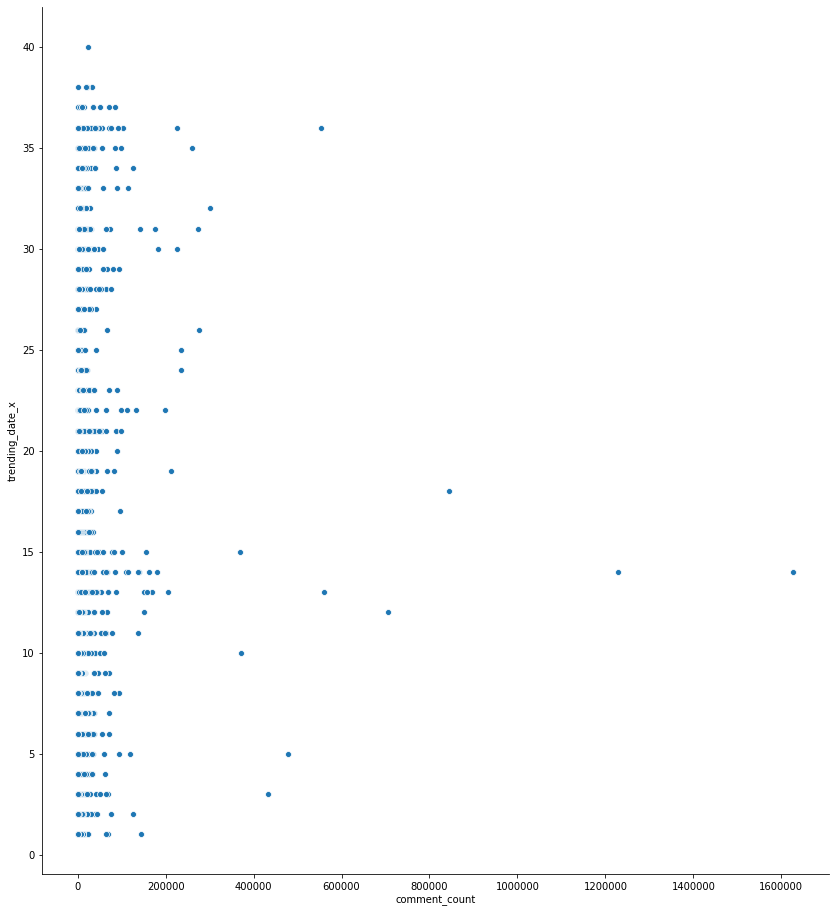

In [57]:
merge = pd.merge(count, dataframed,left_on='title', right_on = 'title')
new = merge[['trending_date_x', 'comment_count']]
g = sn.pairplot(new, x_vars=['comment_count'], y_vars= ['trending_date_x'])
g.fig.set_size_inches(15,15)



Aantal comments heeft niks te maken met hoe lang een video trending is

# Vaakst trending

In [61]:
dataframeGB = gb_dataframe[['trending_date', 'title']]
count = dataframeGB.groupby('title').count().sort_values('trending_date', ascending = False)
count

,trending_date
title,
Maroon 5 - Wait,40
To Our Daughter,38
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights,38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD],38
Anne-Marie - 2002 [Official Video],38
...,...
Katy Perry Guesses Who is from Her Past,1
Kelly Clarkson Carpool Karaoke,1
Kendall Jenner Doesn't Have Baby Fever,1


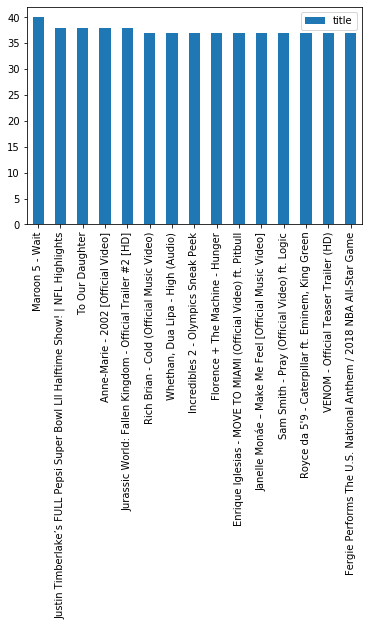

In [66]:
aantal = dataframeGB['title'].value_counts()
aantal = pd.DataFrame(aantal)
aantal = aantal.head(15)
aantal.plot.bar()

In [68]:
likes = gb_dataframe[['likes', 'title', 'trending_date', 'views']].sort_values('title', ascending = False)
likes = likes.drop_duplicates('title', keep = 'first')
likes

gemidl = likes['likes'].sum() / likes['title'].count()
print ("Een trending video heeft gemiddeld", round(gemidl), "aantal likes.")
gemidv = likes['views'].sum() / likes['title'].count()
print ("Een trending video heeft gemiddeld", round(gemidv), "aantal views")

#Conclusie: een trending video moet minimaal 84393 likes en 3225834 views hebben.

Een trending video heeft gemiddeld 84393.0 aantal likes.
Een trending video heeft gemiddeld 3225834.0 aantal views


In [70]:
new2 = pd.merge(count,likes, left_on = 'title', right_on='title')
new2.columns = ("Titel", "Aantal dagen trending", "Aantal likes", "Datum trending", 'Aantal views')
new2 = new2.sort_values('Aantal likes', ascending=False)
new2

,Titel,Aantal dagen trending,Aantal likes,Datum trending,Aantal views
890,BTS (방탄소년단) 'FAKE LOVE' Official MV,14,5530568,18.30.05,115664850
138,Drake - God’s Plan,32,3945009,18.12.03,160187377
644,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,18,3186007,17.17.12,159604206
52,Bad Bunny - Amorfoda | Video Oficial,36,3129283,18.04.03,193642904
3340,"Luis Fonsi, Demi Lovato - Échame La Culpa",1,2686169,17.01.12,143408235
...,...,...,...,...,...
2271,Hylics 2 Preview,7,0,18.19.01,24949
2054,5SOS3 V1 // EUROPEAN TOUR,8,0,18.25.04,135593
2348,Camila Cabello Performs 'Never Be the Same' | ...,6,0,18.22.02,593311
1187,MINECON Earth 2017 Livestream,12,0,17.28.11,1196407


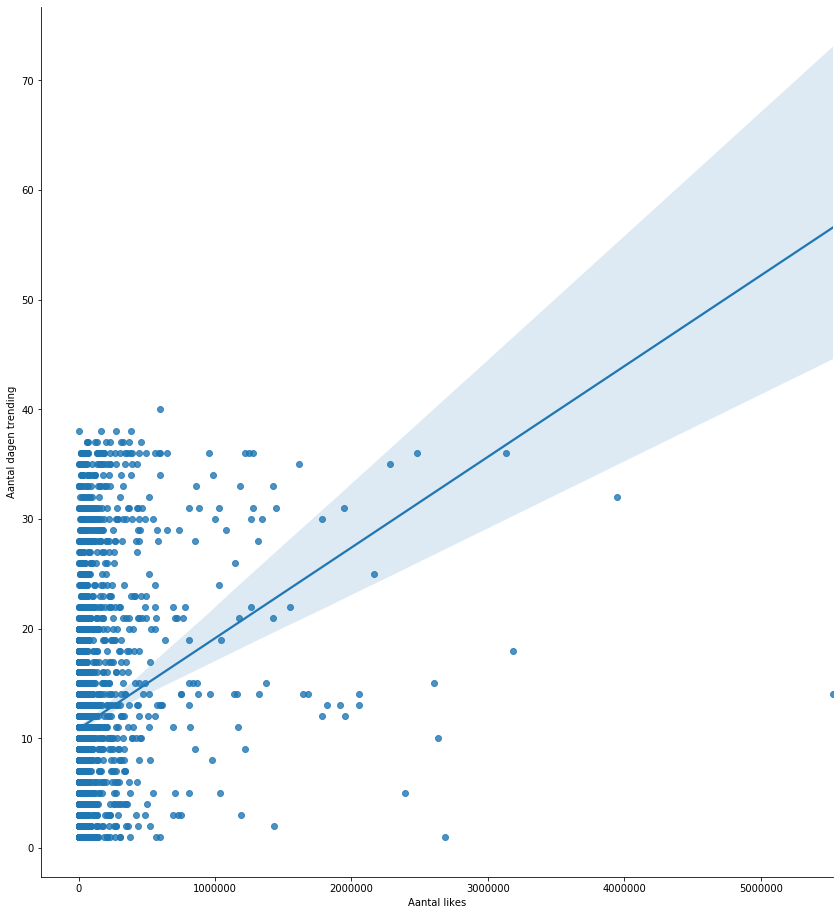

In [74]:
cor = pd.DataFrame({'Aantal dagen trending': new2['Aantal dagen trending'], 'Aantal likes' : new2['Aantal likes']})
cor

g = sn.pairplot(cor, x_vars=['Aantal likes'], y_vars= ['Aantal dagen trending'], kind = 'reg')
g.fig.set_size_inches(15,15)

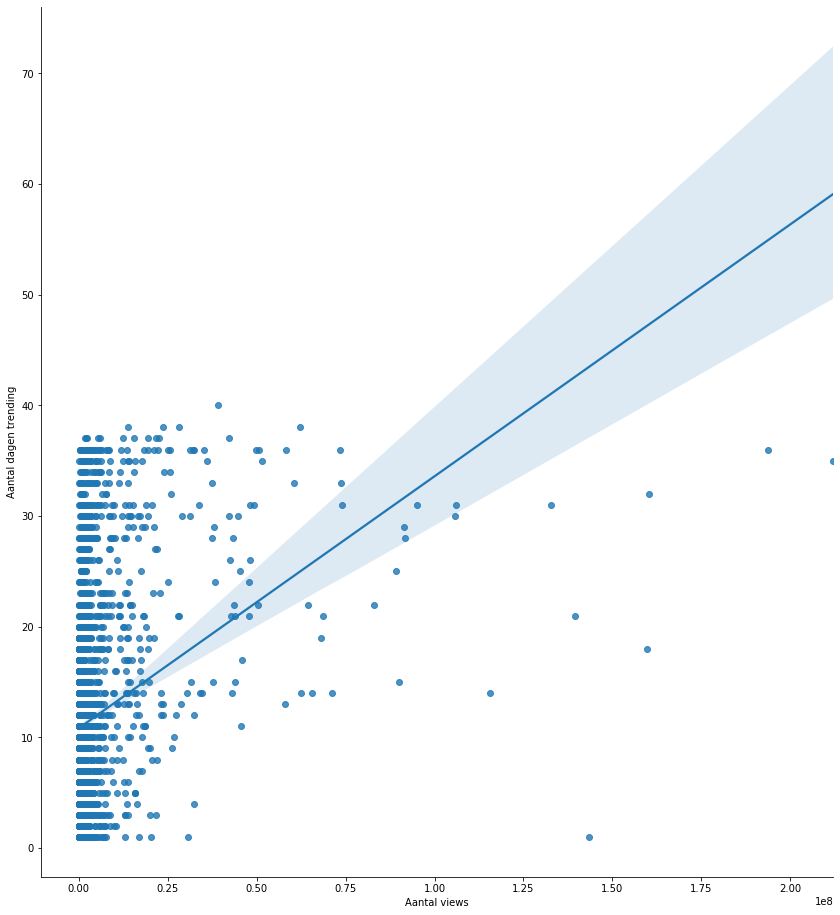

In [75]:
view = pd.DataFrame({'Aantal dagen trending': new2['Aantal dagen trending'], 'Aantal views' : new2['Aantal views']})
view
v = sn.pairplot(view, x_vars=['Aantal views'], y_vars= ['Aantal dagen trending'], kind = 'reg')
v.fig.set_size_inches(15,15)

In [79]:
dataframec = gb_dataframe[['channel_title', 'title']]

channek = gb_dataframe[['channel_title']]
channek = channek.drop_duplicates('channel_title', keep = 'first')
channek

per = pd.DataFrame(gb_dataframe[['likes', 'channel_title']])
per
aantalview = per.groupby('channel_title').sum().sort_values('likes',ascending=True)
aantalview

,likes
channel_title,
altwork,0
Snapchat,0
Alpha Entertainment,0
Noah Antwiler,0
Dancing On Ice,0
...,...
Marvel Entertainment,100670674
Bad Bunny,106452827
DrakeVEVO,148133996


In [82]:
channel = dataframec.groupby('channel_title').count().sort_values('title', ascending = False)

channel
#nieuw
#aantalview
nieuw = pd.merge(channel, aantalview, left_on = 'channel_title', right_on = 'channel_title')
nieuw = pd.DataFrame(nieuw)

nieuw


,title,likes
channel_title,,
The Tonight Show Starring Jimmy Fallon,208,10186101
Jimmy Kimmel Live,207,8505643
TheEllenShow,207,10017427
Saturday Night Live,206,6894625
WWE,205,6232999
...,...,...
Matt Steffanina,1,18974
ETC Show,1,3856
MadisonBeerMusicVEVO,1,47309


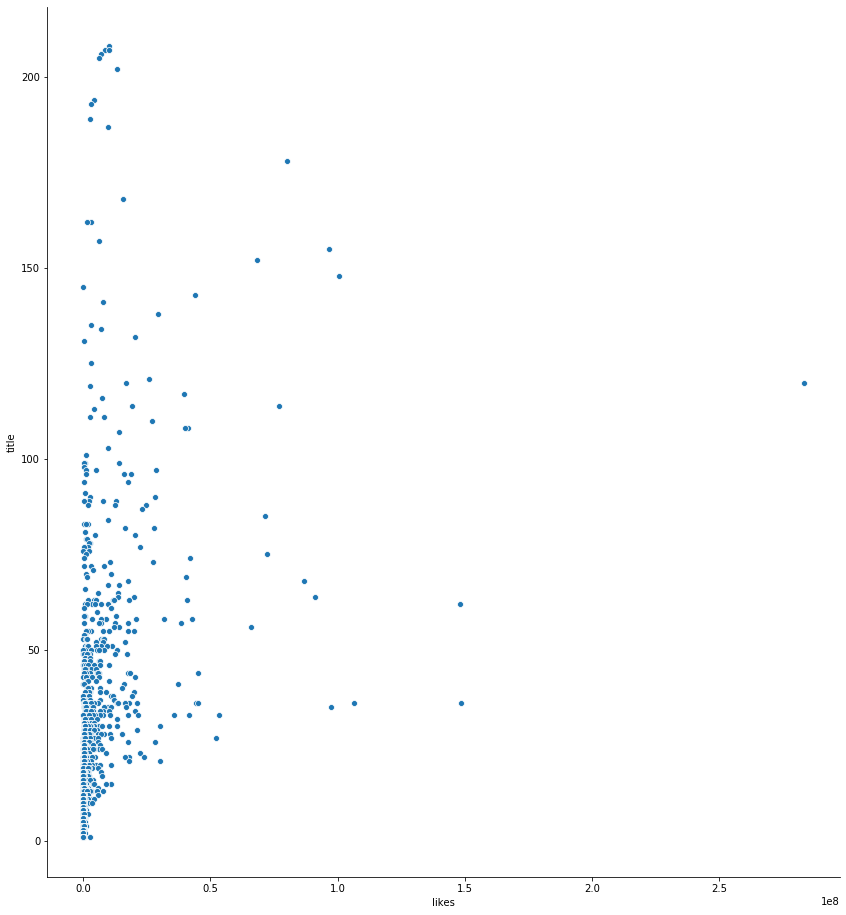

In [83]:
c = sn.pairplot(nieuw, x_vars=['likes'], y_vars= ['title'])
c.fig.set_size_inches(15,15)

Het aantal likes heeft niks te maken met hoe lang een video trending is.
Het aantal views heeft niks te maken met hoe lang een video trending is.
Er is geen verband tussen een kanaal en het aantal views

# Like/dislike ratio per video<br>
### Data prep
De eerste en laatste 5 records laten zien van de engelandse youtube dataset. Ook alleen de benodige kolommen gebruiken (channel title, title, views, likes en dislikes)

In [90]:
dataframeCA = dataframeCA.drop_duplicates(subset='title')
dataframeCA = dataframeCA[['video_id','channel_title', 'title', 'views', 'likes', 'dislikes', 'publish_time']]
sliced_df = dataframeCA
sliced_df = dataframeCA.head(35)
sliced_df = sliced_df.append(dataframeCA.tail(35))


sliced_df['dislikes_view'] = sliced_df['dislikes'] / sliced_df['views'] * 100
sliced_df['likes_view'] = sliced_df['likes'] / sliced_df['views'] * 100

best_ratio =sliced_df[sliced_df['likes_view'] == sliced_df['likes_view'].values.max()]
worst_ratio =sliced_df[sliced_df['dislikes_view'] == sliced_df['dislikes_view'].values.max()]



In [91]:
sliced_df

,video_id,channel_title,title,views,likes,dislikes,publish_time,dislikes_view,likes_view
0,n1WpP7iowLc,EminemVEVO,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579,787425,43420,2017-11-10T17:00:03.000Z,0.253051,4.589104
1,0dBIkQ4Mz1M,iDubbbzTV,PLUSH - Bad Unboxing Fan Mail,1014651,127794,1688,2017-11-13T17:00:00.000Z,0.166363,12.594873
2,5qpjK5DgCt4,Rudy Mancuso,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,146035,5339,2017-11-12T19:05:24.000Z,0.167292,4.575843
3,d380meD0W0M,nigahiga,I Dare You: GOING BALD!?,2095828,132239,1989,2017-11-12T18:01:41.000Z,0.094903,6.309630
4,2Vv-BfVoq4g,Ed Sheeran,Ed Sheeran - Perfect (Official Music Video),33523622,1634130,21082,2017-11-09T11:04:14.000Z,0.062887,4.874563
...,...,...,...,...,...,...,...,...,...
40875,7E1np354AEc,Россия 24,Вечер с Владимиром Соловьевым от 13.06.2018,201847,1568,407,2018-06-13T23:53:29.000Z,0.201638,0.776826
40876,sGolxsMSGfQ,Annoying Orange,HOW2: How to Solve a Mystery,80685,1701,99,2018-06-13T18:00:07.000Z,0.122699,2.108199
40877,8HNuRNi8t70,Elhiwar Ettounsi,Eli Lik Lik Episode 13 Partie 01,103339,460,66,2018-06-13T19:01:18.000Z,0.063867,0.445137
40879,lbMKLzQ4cNQ,The Young Turks,Trump Advisor Grovels To Trudeau,115225,2115,182,2018-06-13T04:00:05.000Z,0.157952,1.835539


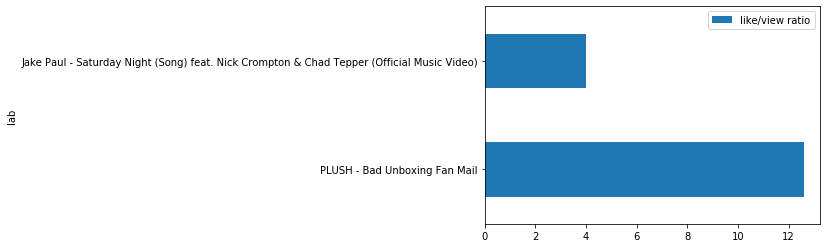

In [93]:
df2 = pd.DataFrame({'lab':[best_ratio['title'].values[0], worst_ratio['title'].values[0]], 'like/view ratio':[best_ratio['likes_view'].values[0], worst_ratio['dislikes_view'].values[0]]})
ax = df2.plot.barh(x='lab', y='like/view ratio', rot=0)

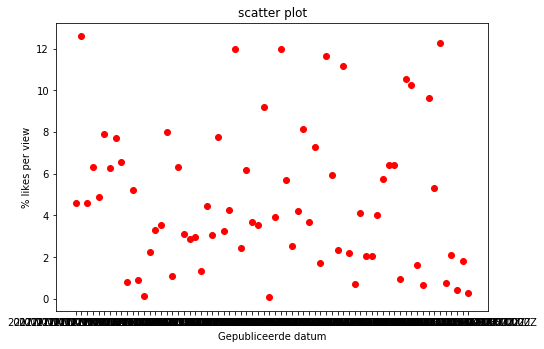

In [94]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

plt.scatter(sliced_df['publish_time'], sliced_df['likes_view'], color='r')
ax.set_xlabel('Gepubliceerde datum')
ax.set_ylabel('% likes per view')
ax.set_title('scatter plot')
plt.show()

Percentage videos met enabled comments 98.24493781478056
Percentage videos met disabled comments 1.755062185219447


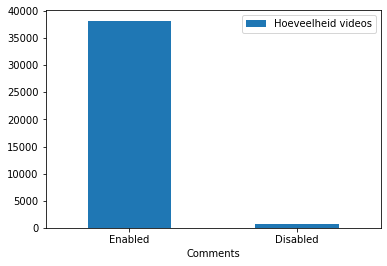

In [100]:
#true of false bij comments disabled
commentsDisabledCount = gb_dataframe['comments_disabled'].sum()
commentsEnabledCount = (~gb_dataframe['comments_disabled']).sum()

df2 = pd.DataFrame({'Comments':['Enabled','Disabled'], 'Hoeveelheid videos':[commentsEnabledCount, commentsDisabledCount]})
ax = df2.plot.bar(x='Comments', y='Hoeveelheid videos', rot=0)

print('Percentage videos met enabled comments', 38233 / gb_dataframe['comments_disabled'].count() * 100)
print('Percentage videos met disabled comments', 683 / gb_dataframe['comments_disabled'].count() * 100)

In [103]:
dataframeGB_DisabledRecords = gb_dataframe[gb_dataframe['comments_disabled']]
dataframeGB_DisabledRecords

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
75,vHCvmZlC5jQ,17.14.11,Every Kevin Spacey Joke from Difficult People,Difficult Psycho,24,2017-11-01T21:45:08.000Z,"kevin spacey|""difficult people""|""julie klausne...",735972,0,0,0,https://i.ytimg.com/vi/vHCvmZlC5jQ/default.jpg,True,True,False,Watch Difficult People on Hulu now!! http://hu...
91,_wM_jY_rass,17.14.11,Bone on Labour HQ,Ross Kempsell,25,2017-11-06T16:12:58.000Z,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN
119,4GFAZBKZVJY,17.14.11,Post Malone - rockstar ft. 21 Savage (Official...,Republic Records,10,2017-11-03T12:07:57.000Z,"Post Malone|""Post Malone rockstar""|""rockstar""|...",24412837,248684,8972,0,https://i.ytimg.com/vi/4GFAZBKZVJY/default.jpg,True,False,False,The #1 hit-single by Post Malone. rockstar fea...
170,fMbuWa-OdN8,17.14.11,WWE Superstar Triple H Addresses Conor McGrego...,Good Morning Britain,17,2017-11-03T11:02:32.000Z,"good morning britain|""breakfast show""|""news""|""...",977942,7220,451,0,https://i.ytimg.com/vi/fMbuWa-OdN8/default.jpg,True,False,False,Subscribe now for more! http://bit.ly/1NbomQa\...
197,Bu2Djx2ejlA,17.14.11,The Making of a Song – “Gorgeous”,AT&T,10,2017-11-01T15:01:19.000Z,"Taylor Swift NOW|""Taylor Swift""|""Swifties""|""Re...",1961295,61000,1281,0,https://i.ytimg.com/vi/Bu2Djx2ejlA/default.jpg,True,False,False,Get an unprecedented glimpse into Taylor's son...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38224,pojXEFDFMw8,18.10.06,2018 FIFA World Cup | Forget | ITV,ITV,24,2018-05-11T11:00:09.000Z,"tv|""television""|""ITV""|""Britain""|""British""|""UK""...",369011,4782,483,0,https://i.ytimg.com/vi/pojXEFDFMw8/default.jpg,True,False,False,Join us this summer for the FIFA World Cup 201...
38382,QW8whgmyTNU,18.11.06,This Is America: Women's Edit,Nicole Arbour,24,2018-05-12T22:42:24.000Z,"Nicole Arbour|""World's Sexiest Comedian""|""funn...",3130833,0,0,0,https://i.ytimg.com/vi/QW8whgmyTNU/default.jpg,True,True,False,About This Is America: Women’s EditI thought i...
38555,QW8whgmyTNU,18.12.06,This Is America: Women's Edit,Nicole Arbour,24,2018-05-12T22:42:24.000Z,"Nicole Arbour|""World's Sexiest Comedian""|""funn...",3140732,0,0,0,https://i.ytimg.com/vi/QW8whgmyTNU/default.jpg,True,True,False,About This Is America: Women’s EditI thought i...
38730,QW8whgmyTNU,18.13.06,This Is America: Women's Edit,Nicole Arbour,24,2018-05-12T22:42:24.000Z,"Nicole Arbour|""World's Sexiest Comedian""|""funn...",3149925,0,0,0,https://i.ytimg.com/vi/QW8whgmyTNU/default.jpg,True,True,False,About This Is America: Women’s EditI thought i...


<br><br>
# Tags in de beschrijving
YouTube maakt gebruik van tags. Volgens Google help, gemaakt door hetzelfde moederbedrijf als YouTube, hebben tags de volgende functie:

_"Tags are descriptive keywords you can add to your video to help people find your content."_
<br><br>
Een tag zorgt er dus voor dat een video makkelijker te vinden is. 
<br>
Hierdoor kan de hypothese worden gesteld dat er een verband is tussen het vinden van een video (het aantal views) en de tags in de beschrijving.<br> Deze hypothese zal in dit onderdeel worden onderzocht.<br><br>
Het onderzoeken van de tags zal gebeuren aan de hand van deelvragen:
* Hoeveel tags worden er gebruikt per video?
* Welke tags worden het meest gebruikt voor trending videos?
* is er een verband tussen het aantal tags per video en het aantal views van deze video?



Om te beginnen is er wat data preparation nodig. Het is namelijk zo dat de tags in de dataset allemaal achter elkaar staan, en opgeslagen zijn als object, en dit object eruit ziet als een hele lange lijst met tekst gescheiden door het "**|**" teken. Dit is hieronder te zien.

In [5]:
print("Het datatype van tags is: {0}. \nEen {0} in dit dataframe ziet er als volgt uit:\n\n{1}".format(gb_dataframe.tags.dtype, gb_dataframe["tags"][0]))

Het datatype van tags is: object. 
Een object in dit dataframe ziet er als volgt uit:

christmas|"john lewis christmas"|"john lewis"|"christmas ad"|"mozthemonster"|"christmas 2017"|"christmas ad 2017"|"john lewis christmas advert"|"moz"


Het werken met deze data is lastig, om deze reden zal er wat data preparatie moeten worden gedaan. Deze preparatie wordt uitgevoerd met de volgende stappen:
- De tags datatypes omzetten van objecten naar string
- De string tags scheiden op basis van het "**|**" teken
- Het verwijderen van de aanhalingstekens die sommige tags bevatten
- Het zetten van [None] tags naar lege cellen zodat ze tellen als 0
- Het verwijderen van videos die al in trending zijn geweest

_Het is belangrijk om te bedenken dat sommige videos meerdere keren kunnen voorkomen in dit dataframe. Dit gebeurt wanneer een video meerdere keren in trending is gekomen. Er is bij het analyseren van de tags gekozen om deze dubbele resultaten uit de dataframe te verwijderen, aangezien de tags bij deze videos hetzelfde blijven, en er is gekozen om deze dataset vanuit het oogpunt van iemand die in trending wil komen is bekeken, en hierbij niet de pre willen meenemen dat deze persoon al eerder dezelfde video in trending heeft gehad._<br><br>

Hieronder wordt er een nieuw dataframe gemaakt met title en tags. De videos die al in de dataset staan worden worden verwijdrd, zodat een video maar een keer voorkomt.

In [6]:
#gb_dataframe = gb_dataframe.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
gb_dataframe_nodupes = gb_dataframe.drop_duplicates(subset = 'video_id', keep= 'first').copy() #drops records with duplicates in the video_id column

gb_dataframe_nodupes["tags"] = gb_dataframe["tags"].replace("[none]", "")
tag_per_title_dataframe = pd.DataFrame({"title" : gb_dataframe_nodupes["title"], "tags" : gb_dataframe_nodupes["tags"].str.split("|")}) 
tag_per_title_dataframe.count()

title    3272
tags     3272
dtype: int64

<br>**Hoeveelheid tags**<br><br>In dit onderdeel gaat er worden uitgezocht hoeveel tags er worden gebruikt voor trending videos. Dit gaat gebeuren door te kijken naar:
* Het gemiddelde aantal tags per video
* De maximum hoeveelheid tags per video
* De normaalverdeling van de hoeveelheid tags per video<br><br>
Hieronder is het gemiddeld aantal tags per video te zien en de maximale hoeveelheid tags.

In [7]:
tag_count = [len(x) for x in tag_per_title_dataframe.tags] #list comprehension to create a list with tags per video
tag_count_dataframe = pd.DataFrame({"title" : gb_dataframe_nodupes["title"],"views" : gb_dataframe_nodupes["views"] ,"tags" : gb_dataframe_nodupes["tags"].str.split("|"), "tag_count" : tag_count})

most_tags = tag_count_dataframe.sort_values(by=["tag_count", "title"], ascending = False) #video with most tags
print("Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond {0} tags heeft.\n De video {1} heeft de meeste tags, namelijk {2}".format(round(tag_count_dataframe.tag_count.mean()), most_tags.title.head(1).to_string(index = False), most_tags.tag_count.head(1).to_string(index=False)))
tag_count_dataframe

Uit de onderstaande dataframe is te halen dat een video in trending gemiddeld afgerond 19 tags heeft.
 De video  부부싸움중인 강아지들 (사람이랑 완전 똑같음ㅋㅋㅋ) heeft de meeste tags, namelijk  78


,title,views,tags,tag_count
0,John Lewis Christmas Ad 2017 - #MozTheMonster,7224515,"[christmas, ""john lewis christmas"", ""john lewi...",9
1,Taylor Swift: …Ready for It? (Live) - SNL,1053632,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",36
2,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579,"[Eminem, ""Walk"", ""On"", ""Water"", ""Aftermath/Sha...",6
3,Goals from Salford City vs Class of 92 and Fri...,27833,"[Salford City FC, ""Salford City"", ""Salford"", ""...",9
4,Dashcam captures truck's near miss with child ...,9815,[],1
...,...,...,...,...
38763,Conway: People are bending to the will of Pres...,99048,"[Fox News Channel, ""FNC"", ""Fox News"", ""News"", ...",21
38767,Семён Слепаков: Олé-Олé-Олé!,6597033,"[Семен Слепаков, ""гитара"", ""бард-десятник"", ""C...",15
38782,Live It Up (Official Video) - Nicky Jam feat. ...,20409647,"[Nicky Jam, ""NickyJamPR"", ""latin"", ""will smith...",33
38793,The Chainsmokers - Somebody ft. Drew Love (Ror...,402345,"[The Chainsmokers Somebody, ""Chainsmokers Some...",17


## visualisatie


In dit onderdeel zal de data van tags gevisualiseerd worden. Dit gaat gebeuren met de hand van de twee onderstaande grafieken.<br><br><br>
**Grafiek 1**
<br>grafiek 1 is de verdeling van de hoeveelheid tags die gebruikt wordt per trending video.<br>Zoals te zien is er *geen* perfecte normaalverdeling in deze grafiek.<br>Wel is er te zien dat, ondanks een gemiddelde van 19 tags per video, de meest gebruikte hoeveelheid tags rond de 10 ligt. 

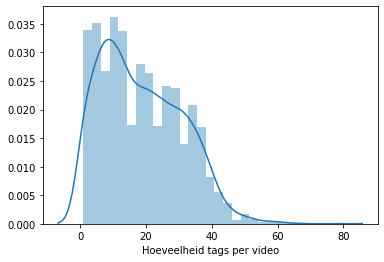

In [8]:
sn.distplot(tag_count, axlabel="Hoeveelheid tags per video")


**Grafiek 2**<br>In deze grafiek zijn de 20 meest gebruikte tags per video te zien.<br>Hierbij is te concluderen dat "Funny" het vaakst voorkomt als tag in trending.<br>Er is overigens gekozen om de videos waar *geen* tags worden gebruikt te labelen als 'No  tags used" 


De tag "funny" wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat "funny" wordt gebruikt in 318 / 60972 videos.


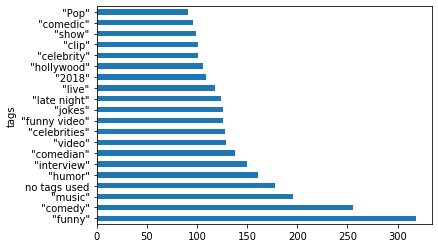

In [9]:
tags_dataframe = tag_per_title_dataframe.explode("tags") #per tag wordt er een nieuwe record aangemaakt met de video ID erbij 
tags_dataframe
tags_dataframe["tags"] = tags_dataframe["tags"].replace("", "no tags used")
most_used_tags_dataframe = tags_dataframe.groupby("tags").size().sort_values(ascending = False).head(20) #Top 20 most used tags
most_used_tags_dataframe.plot.barh()
print("\nDe tag {2} wordt het meest gebruikt bij trending videos. Wanneer je deze getallen omzet naar percentages, is er te concluderen dat {2} wordt gebruikt in {1} / {0} videos.".format(sum(tag_count_dataframe["tag_count"]), most_used_tags_dataframe[0], most_used_tags_dataframe.keys()[0]))


## vergelijking meeste views
Nu de meest gebruikte tags, het gemiddelde aantal tags per video en de meeste aantal tags per video bekend zijn, is er nog een belangrijke vraag over, namelijk: is er een verband tussen het aantal tags en de views op een video. Dit gaat hieronder worden onderzocht.<br><br> De eerste stap die hierin gemaakt is, is het uitzoeken welke videos de meeste kijkers hebben.

In [10]:
view_per_tag_dataframe= tag_count_dataframe.copy()
most_views_tags_dataframe = view_per_tag_dataframe.sort_values("views", ascending = False).head(20)

mutual_tags = [x for x in most_views_tags_dataframe if x in most_used_tags_dataframe]
print(mutual_tags)

#no results => most used tags don't correspond with most succesful video in trending

[]


In [11]:
print("De top 20 meest bekeken videos hebben gemiddeld {} tags per video".format(most_views_tags_dataframe["tag_count"].mean()))
most_views_tags_dataframe

De top 20 meest bekeken videos hebben gemiddeld 17.35 tags per video


,title,views,tags,tag_count
3587,"Luis Fonsi, Demi Lovato - Échame La Culpa",143408235,"[Luis, ""Fonsi"", ""Demi"", ""Lovato"", ""Échame"", ""L...",11
32412,"Becky G, Natti Natasha - Sin Pijama (Official ...",88568646,"[Becky G, ""Natti Natasha"", ""Natti Natasha Musi...",22
28479,"Sebastián Yatra - Por Perro ft. Luis Figueroa,...",47669287,"[Sebastián, ""Yatra"", ""Por"", ""Perro"", ""Andres"",...",8
31702,Ozuna - Única (Video Oficial) 🐻 A U R A,42923278,"[Ozuna, ""Reggaeton"", ""Odisea"", ""Odisea The Alb...",6
34463,BTS (방탄소년단) 'FAKE LOVE' Official MV,39349927,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄""]",6
19664,Rkm & Ken-Y ❌ Natti Natasha - Tonta [Official ...,39118664,"[pina records, ""Natti Natasha"", ""rkm y ken y"",...",30
28458,TWICE What is Love? M/V,38873543,"[TWICE What is Love, ""TWICE What is Love?"", ""T...",35
3198,Marvel Studios' Avengers: Infinity War Officia...,37736281,"[marvel, ""comics"", ""comic books"", ""nerdy"", ""ge...",11
19593,Drake - God’s Plan,33591858,"[Drake new music, ""Drake Gods Plan"", ""Drake Go...",6
6,Ed Sheeran - Perfect (Official Music Video),33523622,"[edsheeran, ""ed sheeran"", ""acoustic"", ""live"", ...",10


## Discussie
- Met de dataset is het niet mogelijk geweest om te bekijken hoe belangrijk tags zijn om in tending te komen, aangezien er geen data is voor non-trending videos.
- In dit onderzoek zijn videos die meerdere malen voorkwamen in de trending database weggelaten.
- Er is bij het kijken naar de meest gebruikte tags niet gekeken naar de categorie waar de tags zijn gebruikt. Het kan dus zijn dat bepaalde tags vaker voorkomen bij een bepaalde categorie videos.

## Conclusie
Als korte samenvatting zijn er in deze conclusie een paar van de bevindingen onder elkaar gezet. <br>Er is gekozen om dit als een print te doen, omdat de variabelen hierdoor niet hard-coded in dit jupyter notebook hoeven te staan. Voer daarom de onderstaande code uit voor een conclusie!


In [12]:
print("""
* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,\n aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen
\n* De top 3 tags die gebruikt zijn onder trending videos zijn: {0}, {1} en {2}
\n* Een trending video gebruikt gemiddeld {3} tags, de video met de meeste tags had {4} tags
\n* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte
\n* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk {5} in vergelijking met {3}.
""".format(most_used_tags_dataframe.keys()[0],most_used_tags_dataframe.keys()[1],most_used_tags_dataframe.keys()[2],round(tag_count_dataframe.tag_count.mean()),most_tags.tag_count.head(1).to_string(index=False) , round(most_views_tags_dataframe["tag_count"].mean())))


* Met de huidige dataset is het niet mogelijk om te bepalen hoe essentieel tags zijn om een video in de youtube-trending lijst te krijgen,
 aangezien de gebruikte dataset alleen videos heeft opgenomen die wel in de trending pagina terecht zijn gekomen

* De top 3 tags die gebruikt zijn onder trending videos zijn: "funny", "comedy" en "music"

* Een trending video gebruikt gemiddeld 19 tags, de video met de meeste tags had  78 tags

* Wanneer er gekeken werd naar de top 20 meest bekeken videos in trending, was het opmerkelijk dat geen van deze videos een van de meest gebruikte tags bevatte

* Naast dit feit, viel het ook op dat het gemiddeld aantal tags voor de videos in de top 20 meest bekeken videos in trending lager ligt dan het gemiddelde van alle trending videos, namelijk 17 in vergelijking met 19.



# Trending data
In dit onderdeel zal de upload datum en de trending datum vergeleken worden.<br>
Dit onderzoek zal gedaan worden doormiddel van de volgende vragen:
- Hoeveel verschil zit er tussen de datum waarop de video voor het eerst trending was en upload datum van videos?
- Wat is het verschil tussen videos die wel meerdere keren trending werden, en die niet meerdere keren trending werden?
- Is het mogelijk om te voorspellen of een trending video opnieuw trending zal worden?

Als eerst wordt er gekeken naar de twee meest belangrijke kolommen voor het beantwoorden van deze vragen, namelijk de kolommen **trending date** en **publish date**.

In [13]:
print("trending date: " + gb_dataframe.trending_date[0], "\npublish date: " + gb_dataframe.publish_time[0])


trending date: 17.14.11 
publish date: 2017-11-10T07:38:29.000Z


Hieruit blijkt dat deze kolommen beiden in een compleet ander formaat staan. Dit is niet alleen het geval omdat de publish date veel meer informatie heeft, maar ook omdat trending date in het formaat **%y%d%m** staat, en publish date in het formaat **%y%m%d**. Om ze makkelijker te kunnen vergelijken, is er daarom besloten om ze in hetzelfde formaat te zetten.

In [14]:
import datetime
formatted_time_dataframe = gb_dataframe.copy()

trending_date = pd.to_datetime(formatted_time_dataframe['trending_date'], format = '%y.%d.%m')
publish_time = pd.to_datetime(formatted_time_dataframe['publish_time'])

formatted_time_dataframe['publish_time'] = publish_time.apply(lambda x:x.date())
formatted_time_dataframe['trending_date'] = trending_date.apply(lambda x:x.date())

formatted_time_dataframe = formatted_time_dataframe.astype({'trending_date': 'datetime64', 'publish_time' : 'datetime64'})
formatted_time_dataframe

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


In [15]:
(formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time'])

0        4 days
1        2 days
2        4 days
3        1 days
4        1 days
          ...  
38911   36 days
38912   34 days
38913   37 days
38914   37 days
38915   34 days
Length: 38916, dtype: timedelta64[ns]

<br>**Verschil trending en publish datum**<br>Om een inzicht te krijgen in het verschil tussen de publish en de trending tijd, is hieronder een kort overzichtje gemaakt met wat interessante cijfers.

In [16]:
print("""
Het duurde gemiddeld {0} dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er {1} dagen over.
De meeste videos die trending zijn geworden deden er {2} over om trending te worden.
""".format(round((formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).mean().days),(formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).max().days,(formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).mode().to_string(index=False)))


Het duurde gemiddeld 36 dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er 3990 dagen over.
De meeste videos die trending zijn geworden deden er 5 days over om trending te worden.



**Verschil tussen videos die meerdere keren in de trending categorie terecht komen en videos die dit maar een keer doen.**<br>
in dit onderdeel zal er worden geprobeerd om een inzicht te krijgen in de factoren die ervoor zorgen dat een video meerdere malen in de trending categorie terecht komt. Dit zal worden gedaan met behulp van een decision tree. Voor dit kan worden gedaan, is er gekozen om enkele kolommen te transformeren, zodat het makkelijker is om een mooi model te maken. Deze worden hieronder genoemd, samen met de reden waarom de kolommen zijn veranderd.

In [17]:
formatted_time_tree_dataframe = formatted_time_dataframe.copy()
formatted_time_tree_dataframe['video_id']
formatted_time_tree_dataframe['multiple_trending_dates'] = formatted_time_tree_dataframe.groupby('video_id')['video_id'].transform('count')

formatted_time_tree_dataframe['multiple_trending_dates']  = np.where(formatted_time_tree_dataframe['multiple_trending_dates']==1, 0, 1)
#transforms data with 0



formatted_time_tree_dataframe["difference_publish_trending(in days)"] = (formatted_time_tree_dataframe["trending_date"]- formatted_time_tree_dataframe['publish_time']).to_string(index=False).replace(" ", "").replace("days","").split("\n")
#crude way to transform a datetime object into a integer in days.

formatted_time_tree_dataframe = formatted_time_tree_dataframe.drop_duplicates(subset = 'video_id', keep= 'first') #drops records with duplicates in the video_id column
#formatted_time_tree_dataframe['difference_publish_trending(in days)'] = pd.to_numeric(formatted_time_tree_dataframe['difference_publish_trending']) #create difference_publish_trending



formatted_time_tree_dataframe



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,multiple_trending_dates,difference_publish_trending(in days)
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,1,4
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,1,2
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,1,4
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,1,1
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38763,YQJmvXamKYg,2018-06-14,Conway: People are bending to the will of Pres...,Fox News,25,2018-06-13,"Fox News Channel|""FNC""|""Fox News""|""News""|""Late...",99048,2231,151,1294,https://i.ytimg.com/vi/YQJmvXamKYg/default.jpg,False,False,False,The senior counselor to the president talks di...,0,1
38767,i63jWjoAWHE,2018-06-14,Семён Слепаков: Олé-Олé-Олé!,Семен Слепаков,23,2018-06-11,"Семен Слепаков|""гитара""|""бард-десятник""|""Comed...",6597033,301185,14448,16505,https://i.ytimg.com/vi/i63jWjoAWHE/default.jpg,False,False,False,Семен в социальных сетях:FACEBOOK https://www....,0,3
38782,V15BYnSr0P8,2018-06-14,Live It Up (Official Video) - Nicky Jam feat. ...,NickyJamTV,10,2018-06-08,"Nicky Jam|""NickyJamPR""|""latin""|""will smith""|""E...",20409647,568680,44854,64390,https://i.ytimg.com/vi/V15BYnSr0P8/default.jpg,False,False,False,Nicky Jam feat. Will Smith & Era Istrefi - Liv...,0,6
38793,BOhylL90UVQ,2018-06-14,The Chainsmokers - Somebody ft. Drew Love (Ror...,The Chainsmokers,10,2018-06-09,"The Chainsmokers Somebody|""Chainsmokers Somebo...",402345,32126,427,1895,https://i.ytimg.com/vi/BOhylL90UVQ/default.jpg,False,False,False,The Chainsmokers - Somebody ft. Drew Love (A R...,0,5


In [18]:
dep_columns =['difference_publish_trending(in days)','category_id',  'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
X = formatted_time_tree_dataframe[dep_columns]
y = formatted_time_tree_dataframe.multiple_trending_dates
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 

clf = DecisionTreeClassifier().fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("nauwkeurigheid:",metrics.accuracy_score(y_test, y_pred))

nauwkeurigheid: 0.8757637474541752


In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = dep_columns, class_names=['yes', 'no'])
#dot_data.getvalue()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

### Conclusie

In [26]:
print("""
Het duurde gemiddeld {0} dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er {1} dagen over.
De meeste videos die trending zijn geworden deden er {2} over om trending te worden.
Verder voor het onderzoeken van de factoren die meespelen bij het meerdere keren trending worden van een video:
   * Voor het opstellen van de tree is er een model gemaakt dat met {3} kan zeggen of een video meerdere keren trending kan worden.
   * De top factoren die meespelen bij het meerdere keren trending gaan video zijn: het aantal comments, de video categorie, en de tijd tussen het publiceren van een video en het voor het eerst trending gaan van een video.
""".format(round((formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).mean().days),(formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).max().days,(formatted_time_dataframe["trending_date"]- formatted_time_dataframe['publish_time']).mode().to_string(index=False), metrics.accuracy_score(y_test, y_pred)))


Het duurde gemiddeld 36 dagen voor een video in dit dataframe om trending te raken.
Verder heeft de video die het langst erover deed om trending te worden er 3990 dagen over.
De meeste videos die trending zijn geworden deden er 5 days over om trending te worden.
Verder voor het onderzoeken van de factoren die meespelen bij het meerdere keren trending worden van een video:
   * Voor het opstellen van de tree is er een model gemaakt dat met 0.8757637474541752 kan zeggen of een video meerdere keren trending kan worden.
   * De top factoren die meespelen bij het meerdere keren trending gaan video zijn: het aantal comments, de video categorie, en de tijd tussen het publiceren van een video en het voor het eerst trending gaan van een video.

